### Import Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

pd.set_option("display.max_rows", None)

### Data Acquisition

In [25]:
df_train = pd.read_csv("/home/felipe/Documents/tier0/kaggle/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/home/felipe/Documents/tier0/kaggle/house-prices-advanced-regression-techniques/test.csv")


In [26]:
# Filter the columns with a type different of object
df_train.dtypes[df_train.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### Check out the size of the data

In [27]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


#### Data Cleaning

In [28]:
# Fill <NA> with "No"
df_train["Alley"].fillna("No", inplace=True)
df_test["Alley"].fillna("No", inplace=True)


#### EDA

###### MSZoning - The general zoning classification <br> SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict. <br><br> <b>Insights:</b> <br> The RL zone appears to be the most desirable in terms of higher property values, followed by FV.<br> The RH and RM zones might be more affordable, reflecting their higher density residential nature.<br> Commercial properties have a different pricing dynamic, likely influenced by factors other than residential desirability.

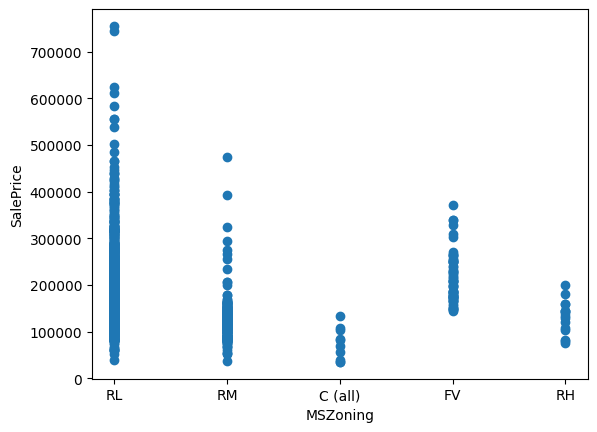

In [29]:
plt.scatter(x=df_train["MSZoning"], y=df_train["SalePrice"])
plt.xlabel("MSZoning")
plt.ylabel("SalePrice")
plt.show()

###### <b>LotFrontage</b>: Linear feet of street connected to property <br> <b>SalePrice</b>: the property's sale price in dollars. This is the target variable that you're trying to predict. <br><br><b>Insights:</b><br> High Density Area: The most common combination in the dataset is a <b>LotFrontage</b> of about 50-100 and a <b>SalePrice</b> of about $100,000 to $200,000. <br> Potential for Anomalies: The data points with exceptionally high <b>LotFrontage</b> values could be anomalies or properties that are significantly different from the majority (e.g., large estates or special properties).

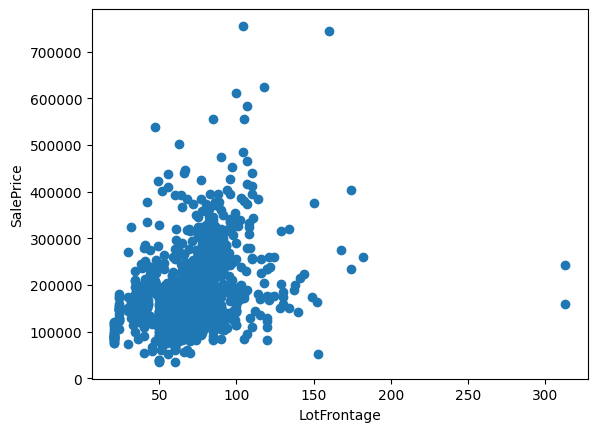

In [30]:
plt.scatter(x=df_train["LotFrontage"], y=df_train["SalePrice"])
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

###### <b>GarageCars</b>: Size of garage in car capacity <br> <b>SalePrice</b>: the property's sale price in dollars. This is the target variable that you're trying to predict. <br><br><b>Insights:</b><br> Positive Correlation Between <b>GarageCars</b> and <b>SalePrice</b> <br> High Variability at Larger <b>GarageCars</b> <br> Less Frequent Large <b>GarageCars</b>


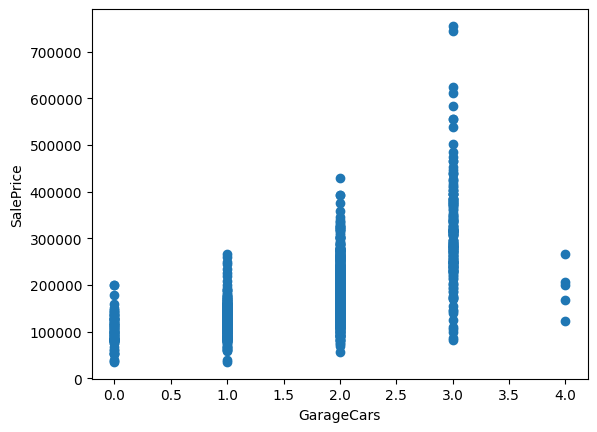

In [31]:
plt.scatter(x=df_train["GarageCars"], y=df_train["SalePrice"])
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.show()

###### Filtering the outliers LotFrontage

In [32]:
df_train.query("LotFrontage > 300")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,No,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,No,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


###### Filtering the outliers SalePrice

In [33]:
df_train.query("SalePrice > 500000")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,No,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
440,441,20,RL,105.0,15431,Pave,No,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
691,692,60,RL,104.0,21535,Pave,No,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,No,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
803,804,60,RL,107.0,13891,Pave,No,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,No,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1046,1047,60,RL,85.0,16056,Pave,No,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1169,1170,60,RL,118.0,35760,Pave,No,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,No,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


###### Z-scores indicate how many standard deviations a data point is from the mean. By sorting the z-scores and displaying the top 10 is possible identify the most extreme outliers.

In [34]:
stats.zscore(df_train["LotArea"]).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

In [35]:
print(df_train["MiscFeature"].unique())
print(df_train["Alley"].unique())

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
['No' 'Grvl' 'Pave']


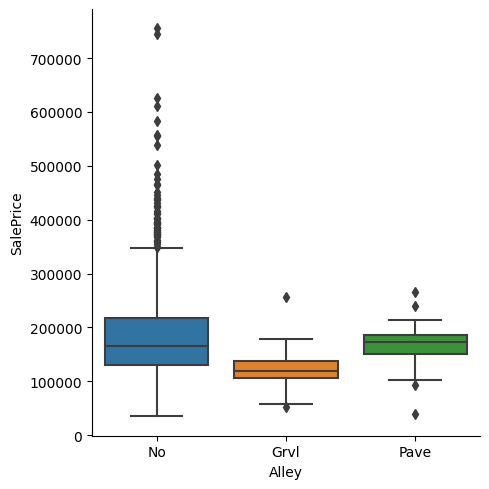

In [36]:
sns.catplot(x="Alley", y="SalePrice", kind="box", data=df_train)